## Import libraries and load the dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [57]:
df = pd.read_csv('./USDT.csv')
df1 = df.reset_index()['Price']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## 2. Split the data into training, test and validate  sets

In [ ]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (606, 1)
Validate shape: (204, 1)


In [60]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (203, 1)


In [61]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [62]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

## 3. Perform RNN Model

## 3.1 Build the RNN Attention Model and fit train data into Model

In [65]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
18/18 [==============================] - 2s 38ms/step - loss: 0.0090 - val_loss: 0.0035
Epoch 2/300
18/18 [==============================] - 0s 25ms/step - loss: 5.3845e-04 - val_loss: 0.0037
Epoch 3/300
18/18 [==============================] - 0s 24ms/step - loss: 1.9715e-04 - val_loss: 0.0034
Epoch 4/300
18/18 [==============================] - 0s 20ms/step - loss: 1.2915e-04 - val_loss: 0.0034
Epoch 5/300
18/18 [==============================] - 0s 26ms/step - loss: 1.1790e-04 - val_loss: 0.0033
Epoch 6/300
18/18 [==============================] - 0s 24ms/step - loss: 1.1588e-04 - val_loss: 0.0033
Epoch 7/300
18/18 [==============================] - 0s 21ms/step - loss: 1.1711e-04 - val_loss: 0.0033
Epoch 8/300
18/18 [==============================] - 1s 30ms/step - loss: 1.1782e-04 - val_loss: 0.0033
Epoch 9/300
18/18 [==============================] - 0s 21ms/step - loss: 1.1585e-04 - val_loss: 0.0032
Epoch 10/300
18/18 [==============================] - 0s 20ms/step -

18/18 [==============================] - 0s 21ms/step - loss: 1.1072e-04 - val_loss: 0.0025
Epoch 80/300
18/18 [==============================] - 0s 20ms/step - loss: 8.8585e-05 - val_loss: 0.0025
Epoch 81/300
18/18 [==============================] - 0s 28ms/step - loss: 8.8162e-05 - val_loss: 0.0025
Epoch 82/300
18/18 [==============================] - 0s 20ms/step - loss: 7.9878e-05 - val_loss: 0.0025
Epoch 83/300
18/18 [==============================] - 0s 24ms/step - loss: 8.6245e-05 - val_loss: 0.0024
Epoch 84/300
18/18 [==============================] - 0s 21ms/step - loss: 8.7212e-05 - val_loss: 0.0024
Epoch 85/300
18/18 [==============================] - 0s 19ms/step - loss: 8.7128e-05 - val_loss: 0.0024
Epoch 86/300
18/18 [==============================] - 0s 23ms/step - loss: 8.3515e-05 - val_loss: 0.0025
Epoch 87/300
18/18 [==============================] - 0s 22ms/step - loss: 8.5143e-05 - val_loss: 0.0025
Epoch 88/300
18/18 [==============================] - 0s 21ms/step -

18/18 [==============================] - 0s 20ms/step - loss: 9.2509e-05 - val_loss: 0.0021
Epoch 157/300
18/18 [==============================] - 0s 25ms/step - loss: 8.9889e-05 - val_loss: 0.0021
Epoch 158/300
18/18 [==============================] - 0s 21ms/step - loss: 7.4717e-05 - val_loss: 0.0021
Epoch 159/300
18/18 [==============================] - 0s 24ms/step - loss: 7.8163e-05 - val_loss: 0.0020
Epoch 160/300
18/18 [==============================] - 1s 29ms/step - loss: 6.6611e-05 - val_loss: 0.0020
Epoch 161/300
18/18 [==============================] - 0s 19ms/step - loss: 6.6017e-05 - val_loss: 0.0020
Epoch 162/300
18/18 [==============================] - 0s 19ms/step - loss: 6.6070e-05 - val_loss: 0.0020
Epoch 163/300
18/18 [==============================] - 0s 26ms/step - loss: 6.4500e-05 - val_loss: 0.0020
Epoch 164/300
18/18 [==============================] - 0s 20ms/step - loss: 7.5990e-05 - val_loss: 0.0020
Epoch 165/300
18/18 [==============================] - 0s 19

18/18 [==============================] - 0s 19ms/step - loss: 6.4705e-05 - val_loss: 0.0018
Epoch 234/300
18/18 [==============================] - 0s 18ms/step - loss: 6.4553e-05 - val_loss: 0.0018
Epoch 235/300
18/18 [==============================] - 0s 20ms/step - loss: 5.6078e-05 - val_loss: 0.0018
Epoch 236/300
18/18 [==============================] - 0s 19ms/step - loss: 6.4177e-05 - val_loss: 0.0017
Epoch 237/300
18/18 [==============================] - 0s 21ms/step - loss: 8.0452e-05 - val_loss: 0.0018
Epoch 238/300
18/18 [==============================] - 0s 25ms/step - loss: 7.3580e-05 - val_loss: 0.0018
Epoch 239/300
18/18 [==============================] - 0s 24ms/step - loss: 7.0771e-05 - val_loss: 0.0018
Epoch 240/300
18/18 [==============================] - 0s 18ms/step - loss: 6.1252e-05 - val_loss: 0.0017
Epoch 241/300
18/18 [==============================] - 0s 19ms/step - loss: 5.7005e-05 - val_loss: 0.0017
Epoch 242/300
18/18 [==============================] - 0s 25

In [67]:
def evaluate_rnn_attention_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [68]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_rnn_attention_model(yval, X_val)

10/10 [==============================] - 0s 7ms/step


### 3.3 Evaluate on Test data

In [69]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_rnn_attention_model(ytest, X_test)

10/10 [==============================] - 0s 12ms/step


In [70]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 0s 7ms/step


### 3.4 Predict price for the next 30 days

In [72]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.45214106 0.4697733  0.45969773 0.49370277 0.50881612 0.51259446
 0.51511335 0.5163728  0.54911839 0.48992443 0.51133501 0.52141058
 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204  0.34256927
 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144 0.33501259
 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542
 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839
 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113 0.5604534
 0.58312343 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179
 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081
 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957
 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068
 0.59949622 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567
 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013
 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292
 0.62720403 0.64609572 0.6209068  0.61335013 0.63602

4 day output [[0.6435822]]
5 day input [0.51259446 0.51511335 0.5163728  0.54911839 0.48992443 0.51133501
 0.52141058 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204
 0.34256927 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144
 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758
 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668
 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113
 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899 0.59193955
 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013
 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791
 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348
 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456 0.60453401
 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068
 0.61335013 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013
 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015
 0.64105793 0.62216625 0.

7 day output [[0.66442674]]
8 day input [0.54911839 0.48992443 0.51133501 0.52141058 0.53904282 0.45843829
 0.50503778 0.49748111 0.3627204  0.34256927 0.35264484 0.34508816
 0.28967254 0.30352645 0.29219144 0.33501259 0.17884131 0.08942065
 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766 0.40302267
 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995  0.52392947
 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176
 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123
 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068
 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622 0.60327456
 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564
 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068
 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902
 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572
 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625 0.62216625
 0.63602015 0.62594458

10 day output [[0.63637894]]
11 day input [0.52141058 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204
 0.34256927 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144
 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758
 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668
 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113
 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899 0.59193955
 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013
 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791
 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348
 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456 0.60453401
 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068
 0.61335013 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013
 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015
 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458 0.60957179
 0.62468514 0.61964736

15 day output [[0.62247545]]
16 day input [0.3627204  0.34256927 0.35264484 0.34508816 0.28967254 0.30352645
 0.29219144 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509
 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234
 0.61083123 0.603274

18 day output [[0.6097495]]
19 day input [0.34508816 0.28967254 0.30352645 0.29219144 0.33501259 0.17884131
 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766
 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995
 0.52392947 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343
 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179
 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068
 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622
 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622
 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625
 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237
 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403
 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625
 0.62216625 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736
 0.5906801  0.61209068 0.60831234 0.61083123 0.60327456 0.61586902
 0.59823678 0.58816121

21 day output [[0.5640492]]
22 day input [0.29219144 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509
 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234
 0.61083123 0.60327456 0.61586902 0.59823678 0.58816121 0.6209068
 0.60327456 0.61838791

24 day output [[0.5882191]]
25 day input [0.08942065 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766
 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995
 0.52392947 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343
 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179
 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068
 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622
 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622
 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625
 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237
 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403
 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625
 0.62216625 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736
 0.5906801  0.61209068 0.60831234 0.61083123 0.60327456 0.61586902
 0.59823678 0.58816121 0.6209068  0.60327456 0.61838791 0.60957179
 0.59823678 0.59823678

27 day output [[0.58935857]]
28 day input [0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234
 0.61083123 0.60327456 0.61586902 0.59823678 0.58816121 0.6209068
 0.60327456 0.61838791 0.60957179 0.59823678 0.59823678 0.59445844
 0.6070529  0.6196473

### 4.  Evaluate accuracy validate, test data

In [73]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE     RMSE
Validate  0.003613  0.034532  0.052946  0.06011
Test      0.001681  0.026190  0.041084  0.04100


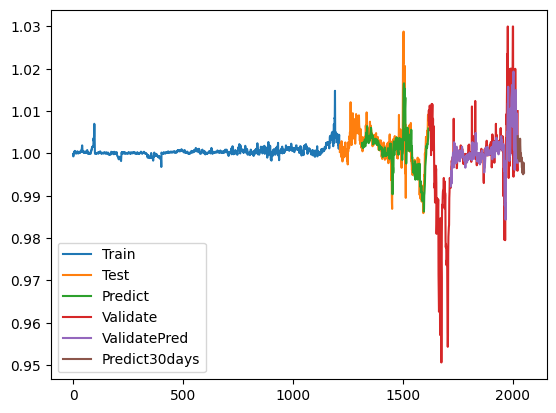

In [74]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()